### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 2nd at 11.59pm CT
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

(500, 4)
(500, 2)


Text(0.5, 0, 'X2')

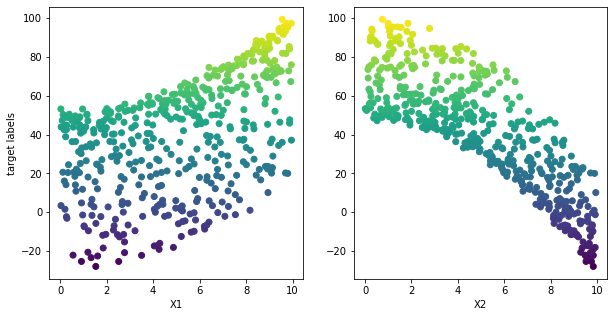

In [1]:
#1. Read in hw7_data_1.npy. The dataset should consist of 500 samples. The first two columns are the two data 
#features, X. The third column is the target labels, y, and the final column are the heteroscedastic 
#uncertainties on the labels, yerr. Make a 2-panel scatter plot of the labels versus each feature.

import numpy as np
import matplotlib.pyplot as plt

#obtaining data from hw6_data_1
data = np.load('../../../../coursework/homeworks/hw_data/hw7_data_1.npy') #reading data
print(np.shape(data))
Xs = data[:,[0,1]] #both features in one 
print(np.shape(Xs))
x1 = data[:,0] #feature 1
x2 = data[:,1] #feature 2
y = data[:,2]  #target labels
yerr = data[:,3] #heteroscedastic uncertainties on labels 

#Plotting feature 1 vs feature 2 for each label
fig,axes = plt.subplots(1,2,figsize=(10,5))

#Panel 1 of X1 vs target labels
axes[0].scatter(x1,y,c=y)
axes[0].set_xlabel('X1')
axes[0].set_ylabel('target labels')

#Panel 2 of X2 vs target labels
axes[1].scatter(x2,y,c=y)
axes[1].set_xlabel('X2')

[57.10102323  4.94873016 -8.30023407]
(50,)


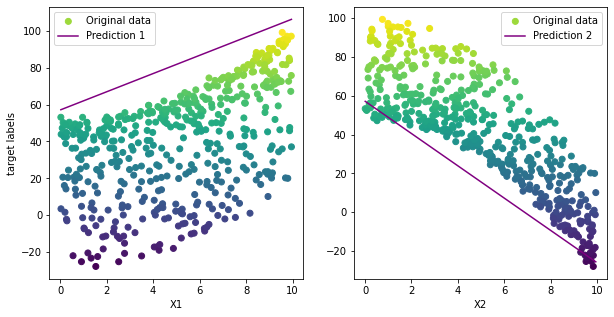

In [30]:
#2. Use multivariate linear regression on this data with its uncertainties (astroML rather than plain sklearn is
#the better option here). Print the best-fit intercept and slopes for the features. Make a prediction Xgrid over
#50 values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the 
#2-panel plot from (1); does this look like a good description of the data?

from astroML.linear_model import LinearRegression

#Get fit using linear regression 
model = LinearRegression()
model.fit(Xs, y, yerr)

#Obtaining intercept and slope 1 and slope 2
print(model.coef_)

#Minimum and maximum values of feature 1 & 2
minx1 = np.min(x1)
maxx1 = np.max(x1)
minx2 = np.min(x2)
maxx2 = np.max(x2)

#Making grid of 50 values using maximum and minimum values
Xgrid1 = np.linspace(minx1,maxx1,50)
Xgrid2 = np.linspace(minx2,maxx2,50)

#Building a prediction grid using Xgrid 1 and Xgrid 2
y_pred1 = model.coef_[0] + model.coef_[1]*Xgrid1
y_pred2 = model.coef_[0] + model.coef_[2]*Xgrid2
print(np.shape(y_pred1))

#Plotting original data with prediction of feature 1
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(x1,y,c=y,label='Original data')
axes[0].set_xlabel('X1')
axes[0].plot(Xgrid1, y_pred1,color='purple',label='Prediction 1')
axes[0].set_ylabel('target labels')
axes[0].legend()

#Plotting original data with prediction of feature 2
axes[1].scatter(x2,y,c=y,label='Original data')
axes[1].plot(Xgrid2, y_pred2,color='purple',label='Prediction 2')
axes[1].set_xlabel('X2')
axes[1].legend()

#This prediction doesn't describe the data very well. A straight line does not accurately describe the 
#complexity of our data

SRT: Great!

In [6]:
#3. Make a new two-dimensional prediction meshgrid Xgrid over the 2-D feature space, use your best-fit model to 
#predict the labels, and make a 3-D interactive plot showing the data and your best-fit over the entire space. 
#You may find the following code useful.

twodmesh = np.meshgrid(Xgrid1, Xgrid2)
# print(np.shape(twodmesh[0])) #xgrid1 at each point in 2d mesh
# print(np.shape(twodmesh[1])) #xgrid2 at each point in 2d mesh

#Grid flattening twodmesh to make it readable to sklearn 
newgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid1, Xgrid2))).T

#Making a prediction of the targets (y) using flattened grid of both grids of features
y_pred2d = model.predict(newgrid)

/tmp/ipykernel_6959/1856646801.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  newgrid = np.vstack(map(np.ravel, np.meshgrid(Xgrid1, Xgrid2))).T


<IPython.core.display.Javascript object>


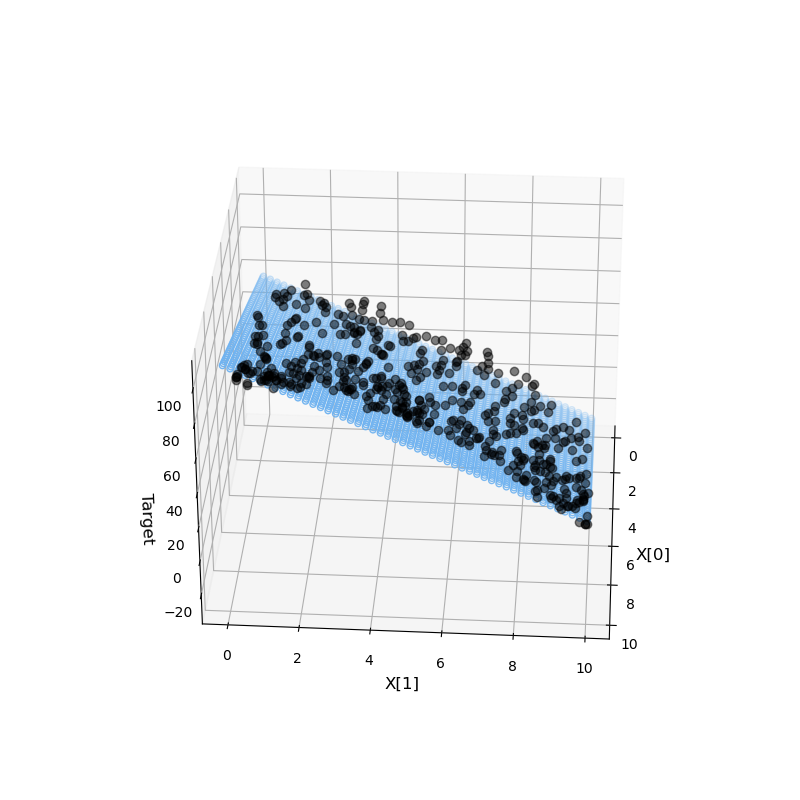

In [7]:
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), y_pred2d, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [26]:
# To turn off interactive plotting
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

alpha = 1.0
solver = svd
score = 0.929182742615996


<IPython.core.display.Javascript object>


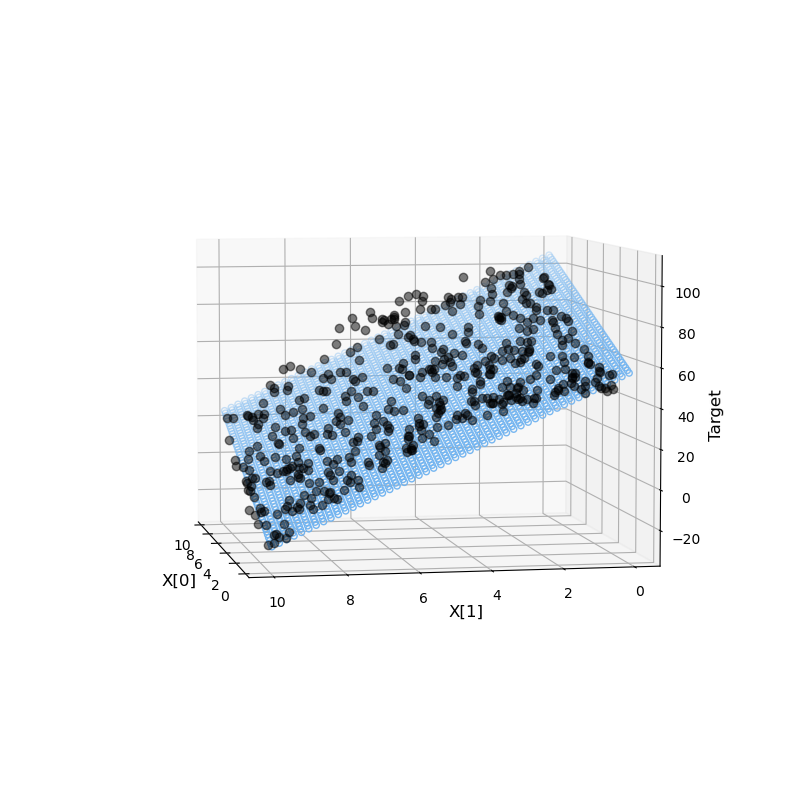

In [31]:
#4. Sticking with a linear model, now attempt a GridSearchCV procedure on the data to find the best Ridge 
#regression hyper-parameters. Use the following param_grid:
#ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
#What are the best_params_ and the best_score_ from this? Fit the data with the best options, and visualize 
#interactively. Try RidgeCV also; what cross-validated alpha_ does it return, and does this agree with 
#GridSeachCV? (Hint: remember to revert to inline matplotlib when you're done each time you make an interactive 
#plot.)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Using gridsearchcv with ridge parameter grid and two different solvers
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']} 

K = 5 # Do 5-fold cross validation
modelridge = Ridge() #Using Ridge
grid = GridSearchCV(modelridge,ridge_params,cv=K) #Cross-Validation
grid.fit(Xs,y,sample_weight=1/yerr**2) #Fitting data
alpha_opt = grid.best_params_['alpha'] #Best alpha from ridge parameters grid
solv_opt = grid.best_params_['solver'] #Best solver from ridge parameters grid
score = grid.best_score_ #Score of the best hyper-parameters used

#Print statements for alpha, solver and score
print('alpha =', alpha_opt)
print('solver =', solv_opt)
print('score =',score)

#Using the best hyper-parameters to fit the data using Ridge regression
opt_model = Ridge(alpha=alpha_opt,solver=solv_opt) #optimal model
opt_model.fit(Xs,y) #optimal model fit
ypred_ridge = opt_model.predict(newgrid) #y prediction


# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), ypred_ridge, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [10]:
from sklearn.linear_model import RidgeCV

#Doing the same as above except using cross validation built into ridge regression
ridgcv = RidgeCV(alphas=(0.05,0.1,0.2,0.5,1.0),cv=K) #cross validation & ridge
ridgcv.fit(Xs,y,sample_weight=1/yerr**2) #fit

#Scoring of hyper-parameters (alpha)
alpharcv_opt = ridgcv.alpha_ #optimum alpha
scorercv = ridgcv.best_score_ #score from best hyper-parameters
print('alpha =', alpharcv_opt)
print('score =',scorercv) 

#These are the same values as using CV and Ridge regression separately!

alpha = 1.0
score = 0.929182742615996


SRT: Very good!

In [32]:
# To turn off interactive plotting
%matplotlib inline

<IPython.core.display.Javascript object>


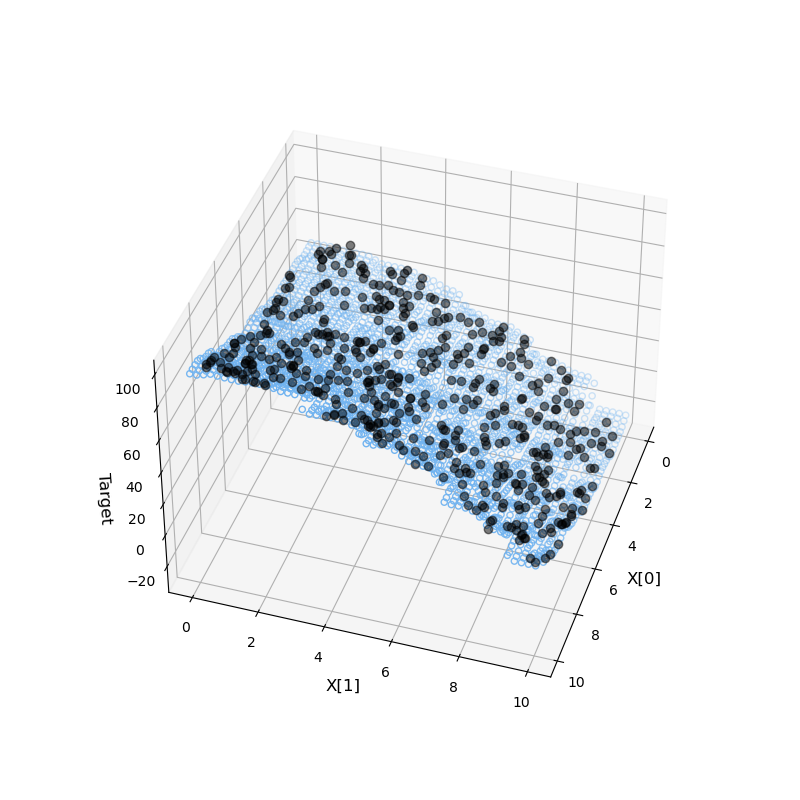

In [33]:
#5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of 0.2. Visualize 
#interactively as before. How does this look compared to previous models?

from astroML.linear_model import NadarayaWatson

#Using Nadaraya-Watson regression
modelNW = NadarayaWatson(kernel='gaussian', h=0.2) #bandwidth = 0.2
modelNW.fit(Xs,y,yerr) #fit

#y prediction using NW regression model
y_predNW = modelNW.predict(newgrid)

# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), y_predNW, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#The Nadaraya-Watson model works much better than previous models since it no longer looks like a 
#flat plane but takes into account the dips and the density of the points into account leading to a 
#shape that follows the shape of the data more closely due to it placing a gaussian for every data point.

SRT: Agreed, it is good. But almost a little too good; it follows all the bumps and wiggles, so may be over-fitting.

In [34]:
# To turn off interactive plotting
%matplotlib inline

<IPython.core.display.Javascript object>


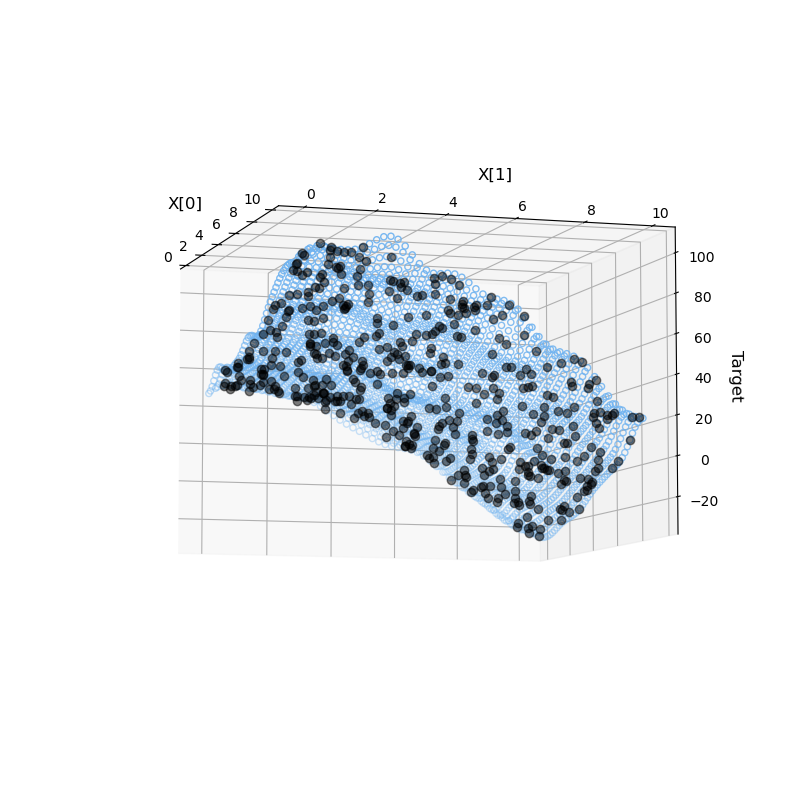

In [35]:
#6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like 
#with and with and without uncertainties accounted for. (Hint: GPR in sklearn takes an alpha parameter equal to 
#(yerr/y)**2.)

from sklearn.gaussian_process import GaussianProcessRegressor, kernels

#Gaussian Process Regression taking into account uncertainties
gpr = GaussianProcessRegressor(kernel=None,alpha=(yerr/y)**2) #yerr taken into account
gpr.fit(Xs, y) #fit

#y prediction using GPR
ypredGPR = gpr.predict(newgrid)

# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), ypredGPR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#The fit using GPR and yerr seems to follow the shape of data very accurately

<IPython.core.display.Javascript object>


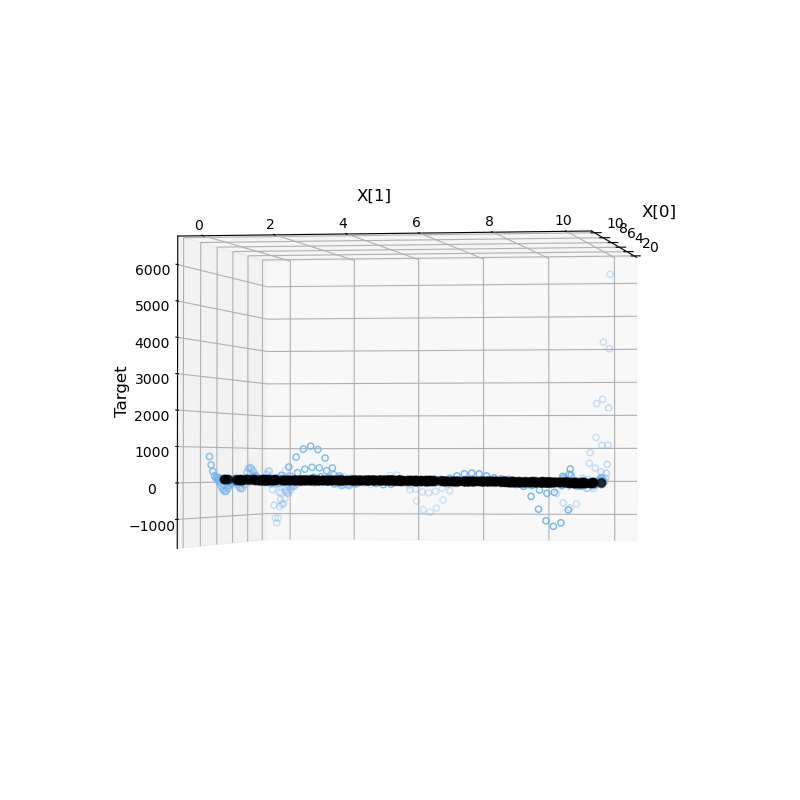

In [36]:
#Gaussian Process Regression without taking into account uncertainties
gpr = GaussianProcessRegressor()
gpr.fit(Xs, y) #fit without yerr

#y prediction with no yerr
ypredGPR = gpr.predict(newgrid)

# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), ypredGPR, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#The fit excluding alpha (uncertainty component) seems to be overfitting since for every small fluctuation
#in the data, the fit varies greatly

SRT: Good

[ 4.99887582e+01  5.54313398e-01 -2.07866484e-01  2.86536907e-01
  2.93842379e-03 -7.82230112e-01  2.47603263e-02  2.45748271e-02
 -2.22233559e-02  9.68417971e-03 -9.95958746e-04 -1.12284370e-03
 -1.14462222e-03  2.10142159e-03 -1.08539159e-03]


<IPython.core.display.Javascript object>


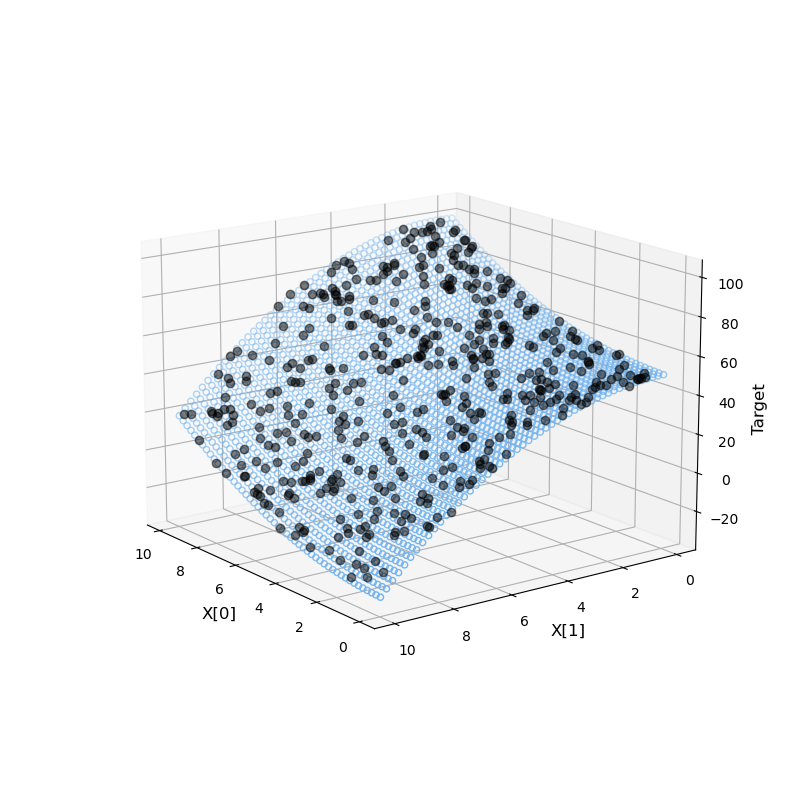

In [37]:
#7. Let's look finally at polynomial fitting. Fit a 4th degree polynomial to the data. Print the best-fit 
#regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look 
#compared to the linear model and GPR models?

from astroML.linear_model import PolynomialRegression

#Fourth degree polynomial fit 
degree = 4
modelpoly = PolynomialRegression(degree) 
modelpoly.fit(Xs, y, yerr)

#y prediction
y_predpoly = modelpoly.predict(newgrid)

#printing best regression coefficients
print(modelpoly.coef_)

# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x1, x2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(twodmesh[0].flatten(), twodmesh[1].flatten(), y_predpoly, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

#This polynomial fit seems to follow the data more closely than the linear regression, but not as closely as
#GPR where the fit seems to follow the dips in the data and differences in density of the points.

In [40]:
# To turn off interactive plotting
%matplotlib inline

In [59]:
#8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation.
#
# >    Using sklearn.model_selection.train_test_split, first do a train-test split with a test_size of 20%. 
#      Then split out a 20% cross-validation set from the training set (leaving a somewhat smaller set to use 
#      for training). Note that you'll need to simultaneously split out yerr as well by just providing this as 
#      another array to train_test_split.
# >    Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of 
#      polynomial degree from 1 to 10 inclusive. Plot the rms errors and BIC values as a function of the 
#      polynomial degree.
# >    Choose the optimal polynomial degree, and train on all training data from the first train_test_split 
#      operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

from sklearn.model_selection import train_test_split

#Train-test split -> test size = 20%
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(Xs, y, yerr, test_size=0.2)
print(np.shape(y_test)) 

#Train-test split of train-test split above for cross-validation
X_train2, X_cv, y_train2, y_cv, yerr_train2, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2)

#Plotting training and cross-validation errors as a function of polynomial degree d (1-10)
d = np.arange(1, 11)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)
BIC_train = np.zeros(d.shape)
BIC_crossval = np.zeros(d.shape)

for i in range(len(d)):
    modelpoly2 = PolynomialRegression(d[i]) #polynomial regression for each degree
    modelpoly2.fit(X_train2, y_train2, yerr_train2) #polynomial fit using training set
    training_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2)/len(X_train2)) #training error
    crossval_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2)/len(X_cv)) #cross validation error
    # Using the definition below of training error, obtaining BIC train equation
    #training error[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)/len(X_train2))
    #BIC_train[i] = np.sqrt(len(X_train2)) * training_err[i] + d[i] * np.log(len(X_train2))
    #BIC_train[i] = np.sqrt(len(X_train2)) * (np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)/len(X_train2))) + d[i] * np.log(len(X_train2))
    #BIC_train[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)) + d[i] * np.log(len(X_train2))
    BIC_train[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)) + d[i] * np.log(len(X_train2))
    BIC_crossval[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2 / yerr_cv**2)) + d[i] * np.log(len(X_cv))


(100,)


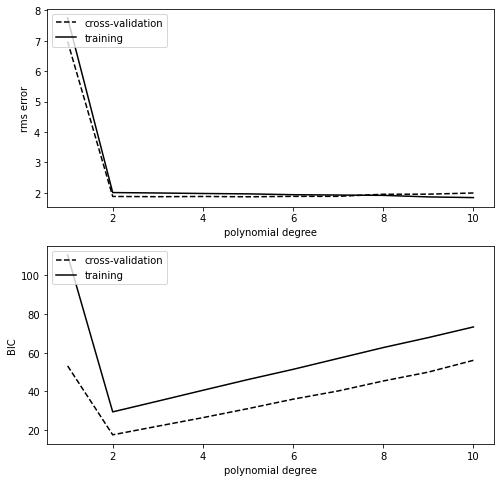

In [60]:
#Plotting

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(d, BIC_crossval, '--k', label='cross-validation')
ax.plot(d, BIC_train, '-k', label='training')

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

SRT: Great work here, Valeria.

In [56]:

#Train-test split -> test size = 20%
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(Xs, y, yerr, test_size=0.2)
print(np.shape(y_test)) 

#Train-test split of train-test split above for cross-validation
X_train2, X_cv, y_train2, y_cv, yerr_train2, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2)

#Plotting training and cross-validation errors as a function of polynomial degree d (1-10)
d = np.arange(1, 11)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)
BIC_train = np.zeros(d.shape)
BIC_crossval = np.zeros(d.shape)

for i in range(len(d)):
    modelpoly2 = PolynomialRegression(d[i]) #polynomial regression for each degree
    modelpoly2.fit(X_train2, y_train2, yerr_train2) #polynomial fit using training set
    training_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)/len(X_train2)) #training error
    crossval_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2 / yerr_cv**2)/len(X_cv)) #cross validation error
    BIC_train[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)) + d[i] * np.log(len(X_train2))
    BIC_crossval[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2 / yerr_cv**2)) + d[i] * np.log(len(X_cv))


(100,)


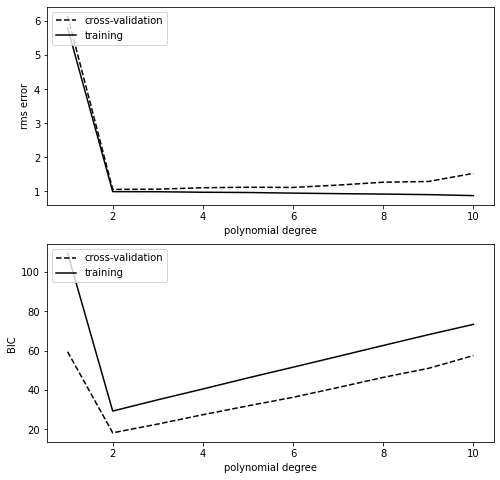

In [58]:
#Plotting

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(211)
ax.plot(d, crossval_err, '--k', label='cross-validation')
ax.plot(d, training_err, '-k', label='training')

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(d, BIC_crossval, '--k', label='cross-validation')
ax.plot(d, BIC_train, '-k', label='training')

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

In [61]:
#Tried to include yerr*2 and yerr_cv**2 in the training_err[i] and crossval_err[i]

#including the division of yerr_train2**2 & yerr_cv**2
'training_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2 / yerr_train2**2)/len(X_train2))' #training error
'crossval_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2 / yerr_cv**2)/len(X_cv))' #cross validation error
    
#without it
'training_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_train2)- y_train2)**2)/len(X_train2))' #training error
'crossval_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2)/len(X_cv))' #cross validation error

#Plotted both and got similar enough results as seen above with only slightly smaller value for the BIC
#for the cross-validation

'crossval_err[i] = np.sqrt(np.sum((modelpoly2.predict(X_cv)- y_cv)**2)/len(X_cv))'

SRT: I didn't see anything summarizing your answer to the last part of the question. Based on your results, what is the optimal polynomial degree, and using that, what is the testing rms error value? -3